# GPU arrays and Memory management

Similarly at any processing librairy, pyclesperanto aim to manipulate and process data. These data are usually nD arrays (1D, 2D, 3D).

We will base the data manipulation on three operations:
- creating a memory space on the device
- pushing data into the device
- pulling the data from the device

In [1]:
import numpy as np
import pyclesperanto as cle

cle.select_device('TX')

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.274.02
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24183 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6045 MB
	Max Clock Frequency:         2520 MHz
	Image Support:               Yes

### Create 

We `create` a memory space on the device. The create array is empty by default (all value to 0).  
The only argument is its shape, following the coordinate standard (z,y,x). It is also possible to pass a `dtype` argument to specify the data type to be stored.
In this case, we are using `float32` type (the default type).

Note: float64 type are not compatible for hardware reasons.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(128, 128), dtype=float32, mtype=buffer)
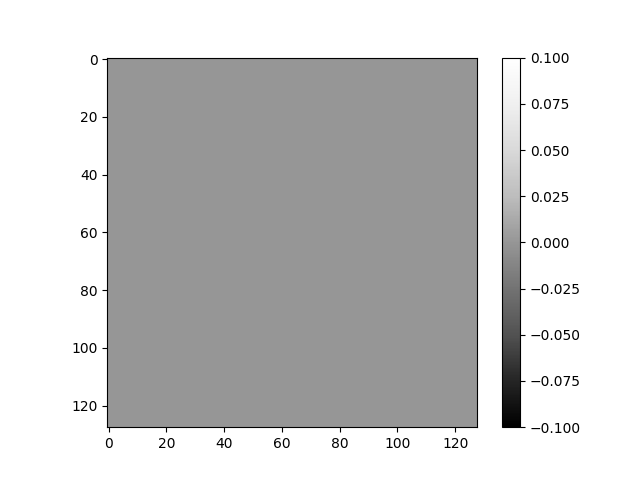
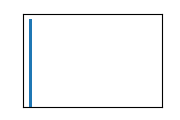

In [2]:
empty_array = cle.create((128,128), dtype=np.float32)
empty_array

### Push 

If we already have a data array, an image for example, then we simply have to `push` it on the device. 
This is in fact two operation, a `create` space memory, and a `copy` the memory into the created space on the device.  

Let's first create an array, using numpy

In [3]:
array = np.random.random((128,128)).astype(np.float32)
print(type(array), array.shape, array.dtype)

<class 'numpy.ndarray'> (128, 128) float32


We can now push it to the device using the `push` method. Here we will use the same `dtype` and `shape` provided by the numpy array to define the array on the device.

array([[0.6377785 , 0.20551111, 0.10737482, ..., 0.6832224 , 0.83143365,
        0.75629437],
       [0.5462181 , 0.56965154, 0.7280983 , ..., 0.46603394, 0.23578475,
        0.28837484],
       [0.12271918, 0.9487773 , 0.6159287 , ..., 0.7533548 , 0.4162253 ,
        0.04893303],
       ...,
       [0.70218766, 0.45010954, 0.34610772, ..., 0.02973257, 0.6727445 ,
        0.3658677 ],
       [0.19878745, 0.6171842 , 0.16779235, ..., 0.25520933, 0.12450767,
        0.4533013 ],
       [0.3106212 , 0.13184206, 0.7611349 , ..., 0.60897887, 0.06356321,
        0.00249615]], shape=(128, 128), dtype=float32, mtype=buffer)
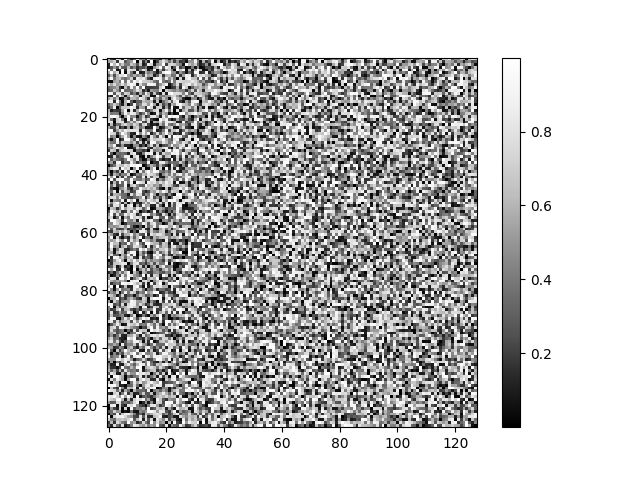
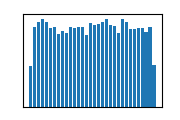

In [4]:
random_array = cle.push(array)
random_array

### Pull 

`pull` is the exact inverse of the `push`. Here  we want to read back the memory located on the device.  
Similarly to the `push` that read the information from the numpy metadata, we do the same for the pull, 
we read the metadata of our pyclesperanto array and create a corresponding numpy array to store the read data.

In [5]:
read_array = cle.pull(random_array)
print(type(read_array), read_array.shape, read_array.dtype)

<class 'numpy.ndarray'> (128, 128) float32


Here we just pull the array we pushed earlier. They should be the same as we did not do any processing on it.

In [6]:
assert(np.array_equal(array,read_array))